# Vegetation & Ecosystem Monitoring Indicies: NDVI S2


Maasai Mara - Serengti Ecosystem


--------------

DTR


# Import Packages

In [1]:
from osgeo import gdal

In [2]:
from osgeo import osr

In [3]:
import numpy as np

In [4]:
#import cartopy

In [5]:
import matplotlib.pyplot as plt

In [6]:
from matplotlib.colors import ListedColormap

In [7]:
import time

In [8]:
import os

## Directory Management

In [41]:
#os.getcwd()

In [10]:
dir_data = '/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/Sentinel_2/MARA/'

#S2 Image
SENT2_IMG_DIR = 'S2B_MSIL2A_20190226T074859_N0213_R135_T36MYD_20201120T104245.SAFE/'


dir_data = os.path.join(dir_data, SENT2_IMG_DIR)
dir_data


'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/Sentinel_2/MARA/S2B_MSIL2A_20190226T074859_N0213_R135_T36MYD_20201120T104245.SAFE/'

In [11]:
# list the files in the directory
os.listdir(dir_data)

['manifest.safe',
 'AUX_DATA',
 'rep_info',
 'INSPIRE.xml',
 'GRANULE',
 'Mara_T36MYD_20190226T074859_B08_10m.tif',
 'MTD_MSIL2A.xml',
 'Mara_T36MYD_20190226T074859_B04_10m.tif',
 'Mara_T36MYD_20190226T074859_B03_10m.tif',
 'T36MYD_20190226T074859_B08_10m.tif',
 'DATASTRIP',
 'Mara_T36MYD_20190226T074859_TCI_10m.tif',
 'S2B_MSIL2A_20190226T074859_N0213_R135_T36MYD_20201120T104245-ql.jpg',
 'Mara_T36MYD_20190226T074859_B02_10m.tif']

In [12]:
os.chdir(dir_data)

In [13]:
os.getcwd()

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/Sentinel_2/MARA/S2B_MSIL2A_20190226T074859_N0213_R135_T36MYD_20201120T104245.SAFE'

# List files

In [14]:
fpaths_Sentinel_2_fullpath = []

fpaths_Sentinel_2_filenamesonly = []


# r=root, d=directories, f = files
for r, d, f in os.walk("."):
    for file in f:
        if file.startswith("Mara_"):
            #print(os.path.join(r, file))
            fpaths_Sentinel_2_fullpath.append(os.path.join(r, file))
            ## file only no path
            fpaths_Sentinel_2_filenamesonly.append(file)
            
            
print('... completed searching and listing')

... completed searching and listing


In [15]:
fpaths_Sentinel_2_fullpath

['./Mara_T36MYD_20190226T074859_B08_10m.tif',
 './Mara_T36MYD_20190226T074859_B04_10m.tif',
 './Mara_T36MYD_20190226T074859_B03_10m.tif',
 './Mara_T36MYD_20190226T074859_TCI_10m.tif',
 './Mara_T36MYD_20190226T074859_B02_10m.tif']

# Sentinel 2: 10 metre Spectral Bands

|Band| Spatial Res| Central wv | Description|
|----|---|---|----|
|B2|	10 m|	490 nm|	Blue|
|B3|	10 m|	560 nm|	Green|
|B4|	10 m|	665 nm|	Red|
|B8|   10m | 842 nm|VNIR|

# Read data

Band 02 - 10 metre

In [16]:
Band_want = "B02_10m"

fle_nem = [s for s in fpaths_Sentinel_2_fullpath if Band_want in s]
#fle_nem

In [40]:
ds_10m_B2 = gdal.Open(fle_nem[0])
ds_10m_B2

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f74ab7cbc00> >

In [18]:
ds_10m_B2.GetProjection()

'PROJCS["WGS 84 / UTM zone 36S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",33],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32736"]]'

In [19]:
ds_10m_B2.GetGeoTransform()

(701240.0, 10.0, 0.0, 9867800.0, 0.0, -10.0)

Band 3 - 10m

In [20]:
Band_want = "B03_10m"


fle_nem = [s for s in fpaths_Sentinel_2_fullpath if Band_want in s]
#print(fle_nem)

ds_10m_B3 = gdal.Open(fle_nem[0])
ds_10m_B3

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f7208039ef0> >

In [21]:
ds_10m_B3.GetGeoTransform()

(701240.0, 10.0, 0.0, 9867800.0, 0.0, -10.0)

Band 4 - 10m

In [22]:
Band_want = "B04_10m"


fle_nem = [s for s in fpaths_Sentinel_2_fullpath if Band_want in s]
#print(fle_nem)

ds_10m_B4 = gdal.Open(fle_nem[0])
ds_10m_B4

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f720803a160> >

In [23]:
Band_want = "B08_10m"

fle_nem = [s for s in fpaths_Sentinel_2_fullpath if Band_want in s]
#print(fle_nem)

ds_10m_B8 = gdal.Open(fle_nem[0])
ds_10m_B8

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f720803a9d0> >

# Read the data arrays

In [24]:
arr_10m_B02 = ds_10m_B2.ReadAsArray()

arr_10m_B03 = ds_10m_B3.ReadAsArray()

arr_10m_B04 = ds_10m_B4.ReadAsArray()

arr_10m_B08 = ds_10m_B8.ReadAsArray()

In [25]:
arr_10m_B02.shape

(5147, 6764)

In [26]:
arr_10m_B03.shape

(5147, 6764)

In [27]:
arr_10m_B08.shape

(5147, 6764)

In [28]:
arr_10m_B08.min(), arr_10m_B08.max()

(558, 7272)

# Normalize Data

We can use a min-max rescaling, so that the output values are in between 0 and 1

## Min-Max Function

In [29]:
# Function to normalize the raster values

def minmax_normalize(array):
    """
    Normalizes raster arrays to between 0.0 and 1.0
    """
    arr_min_val, arr_max_val = array.min(), array.max() # Get the minimum and maximum value
    
    return ((array - arr_min_val)/(arr_max_val - arr_min_val))

## Normalize the data

In [30]:
arr_norm_10m_B2 = minmax_normalize(arr_10m_B02)  # resulting values should be between 0 and 1

arr_norm_10m_B3 = minmax_normalize(arr_10m_B03)  # resulting values should be between 0 and 1

arr_norm_10m_B4 = minmax_normalize(arr_10m_B04)  # resulting values should be between 0 and 1

arr_norm_10m_B8 = minmax_normalize(arr_10m_B08)  # resulting values should be between 0 and 1

In [31]:
arr_norm_10m_B4.min(), arr_norm_10m_B4.max()

(0.0, 1.0)

# NDVI Index

\begin{equation}
\text{NDVI} = \frac{ NIR- RED }{ RED +  NIR }
\end{equation}

Red = Band 4

NIR = Band 8





In [32]:
ndvi_norm = (arr_norm_10m_B8  - arr_norm_10m_B4)/(arr_norm_10m_B8 + arr_norm_10m_B4)

ndvi_norm

array([[0.89247321, 0.87254354, 0.83926213, ..., 0.57539112, 0.60201676,
        0.56338582],
       [0.85489223, 0.84415018, 0.83960478, ..., 0.58924577, 0.56881652,
        0.536624  ],
       [0.84995312, 0.84666145, 0.87312008, ..., 0.55182757, 0.54207409,
        0.49473353],
       ...,
       [0.67137736, 0.63165228, 0.6027689 , ..., 0.69854018, 0.73282268,
        0.76477255],
       [0.64444024, 0.66989028, 0.64323256, ..., 0.64162224, 0.70283653,
        0.68635246],
       [0.61693724, 0.64678462, 0.62483108, ..., 0.56902223, 0.65780542,
        0.61616289]])

In [33]:
ndvi_norm.min(), ndvi_norm.max()

(-1.0, 1.0)

## Plot

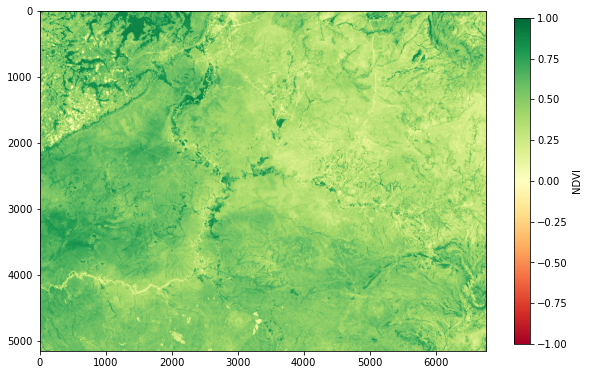

In [34]:

plt.figure(figsize=(10,8))

plt.imshow(ndvi_norm, cmap="RdYlGn")
# add colobar
plt.colorbar( shrink=0.75, label='NDVI')


plt.show()

Use geotransform to improce axis labels

In [35]:
num_cols = ds_10m_B3.RasterXSize
num_rows = ds_10m_B3.RasterYSize

In [36]:
x0, dx, xrot, y0, yrot, dy = ds_10m_B3.GetGeoTransform()

In [37]:
x1 = x0 + dx*num_cols
x1

768880.0

In [38]:
y1 = y0 + dy*num_rows
y1

9816330.0

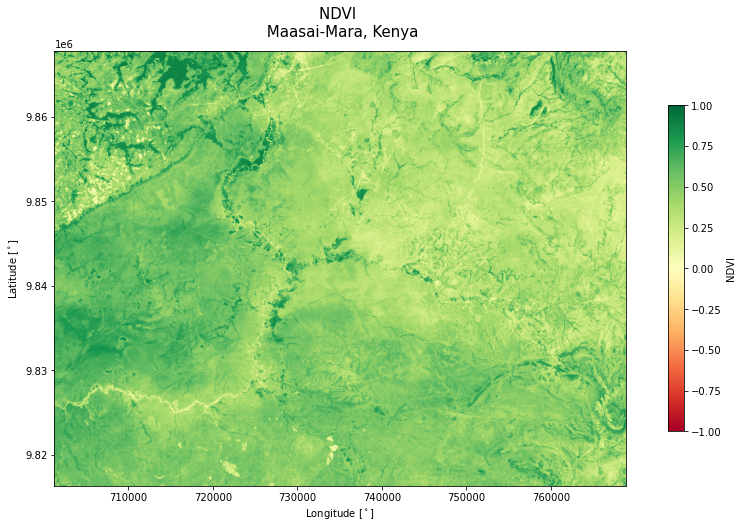

In [42]:
plt.figure( figsize=(15, 8) )
#plot an image
plt.imshow(ndvi_norm, cmap="RdYlGn", extent=[x0,x1,y1, y0] )
# add colobar
plt.colorbar( shrink=0.75, label='NDVI')
#add title
plt.title("NDVI \n Maasai-Mara, Kenya", y=1.02, fontsize=15)
# label x and y-axis
plt.ylabel('Latitude [$^\circ$]')
plt.xlabel('Longitude [$^\circ$]')
#plt.yticks(rotation=90)
# save figure to folder
#plt.savefig('Fig1_DEM_UMSC.png', dpi=250)
##show
plt.show()